In [ ]:
# # # # # # # # # # #函数列表# # # # # # # # # # #

# # 初始化两层神经网络各层参数
# def initialize_parameters(n_x, n_h, n_y):

# # 初始化深层神经网络的各层参数
# def initialize_parameters_deep(layer_dims):

# # 单层网络-向前传播-激活函数的-输入值计算
# def linear_forward(A, W, b):

# # 单层网络-向前传播-激活函数的-输出值计算
# #此过程与具体的激活函数有关
# def linear_activation_forward(A_prev, W, b, activation):

# # 实现向前传播
# def L_model_forward(X, parameters):

# # 单层网络-反向传播-激活函数梯度的-输出值计算
# def linear_backward(dZ, cache):

# # 单层网络-反向传播-激活函数梯度的-输入值计算
# #此过程与具体的激活函数有关
# def linear_activation_backward(dA, cache, activation):

# # 损失函数的计算
# def compute_cost(AL, Y):

# # 实现向后传播
# def L_model_backward(AL, Y, caches):

# # 更新函数的计算
# def update_parameters(parameters, grads, learning_rate):

In [70]:
import numpy as np
from testCases import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

In [71]:
# 初始化两层神经网络各层参数

def initialize_parameters(n_x, n_h, n_y):
    """
    Arguments:
        n_x -- 输入层size
        n_h -- 隐含层size
        n_y -- 输出层size
    
    Returns:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
   
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [72]:
# test
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [73]:
# 初始化深层神经网络的各层参数

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
        layer_dims -- 包含各层的size
    
    Returns:
    parameters -- 
        Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        bl -- bias vector of shape (layer_dims[l], 1)
    """
    #-------test------
    np.random.seed(3)
    #-------test------
    parameters = {}
    L = len(layer_dims)            # 有几层网络

    for l in range(1, L):
        #初始化第l层的W矩阵和b向量
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)]= np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [74]:
# test
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [75]:
# 单层网络-向前传播-激活函数的-输入值计算

def linear_forward(A, W, b):
    """
    Arguments:
    A -- 前一层的激活值向量
    W -- 当前层的W矩阵——shape (size of current layer, size of previous layer)
    b -- 当前层的偏移向量——shape (size of the current layer, 1)

    Returns:
    Z -- 激活函数的输入值
    cache -- 记住当前层的参数供反向传播快速计算使用
    """
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [76]:
# test
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [77]:
# 单层网络-向前传播-激活函数的-输出值计算

def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev -- 前一层的激活值向量
    W -- 当前层的W矩阵——shape (size of current layer, size of previous layer)
    b -- 当前层的偏移向量——shape (size of the current layer, 1)
    activation -- 激活函数的选择——"sigmoid" or "relu"

    Returns:
    A -- 激活函数的输出值
    cache -- 记住当前层的参数供反向传播快速计算使用
             contain:
                 1)linear_cache-(A,W,b)
                 2)activation_cache-当前层的激活值
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [78]:
#test
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [79]:
# 实现向前传播

def L_model_forward(X, parameters):
    """
    Arguments:
    X -- 输入矩阵-shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- 最终的输出值
    caches -- 从0到L-1层的cache-linear_activation_forward()
    """

    caches = []
    A = X
    # 神经网络的层数
    L = len(parameters) // 2                  
    
    #前L-1层的传播
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)],"relu")
        caches.append(cache)
    
#     第L层的计算
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [80]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [81]:
# 损失函数的计算

def compute_cost(AL, Y):
    """
    Arguments:
    AL -- 向前传播的最终输出向量-shape (1, number of examples)
    Y -- 实际的标签值

    Returns:
    cost -- 损失值
    """
    
    m = Y.shape[1]
    #按照函数计算损失值
    cost = -np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)))/m
    
    cost = np.squeeze(cost)      # e.g. [[17]] into 17
    assert(cost.shape == ())
    
    return cost

In [82]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


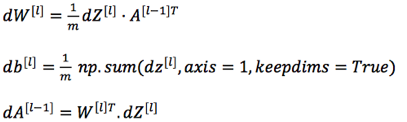

In [83]:
# 单层网络-反向传播-激活函数梯度的-输出值计算

def linear_backward(dZ, cache):
    """
    Arguments:
    dZ -- 当前层的dZ
    cache -- 当前层的正向传播的cache（A,W,b）

    Returns:
    dA_prev -- 前一层的梯度输入
    dW -- 损失函数对W的梯度
    db -- 损失函数对b的梯度
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    #利用公式计算各参数的梯度
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [84]:
#test
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


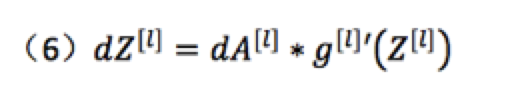

In [85]:
# 单层网络-反向传播-激活函数梯度的-输入值计算
#此过程与具体的激活函数有关
def linear_activation_backward(dA, cache, activation):
    """
    Arguments:
    dA -- 当前层的dA
    cache -- 向前传播的cache(linear_cache, activation_cache)
    activation -- 激活函数类型
    
    Returns:
    dA_prev -- 前一层的dA
    dW -- 损失函数对W的梯度
    db -- 损失函数对b的梯度
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        #计算当前层的dZ
        dZ = relu_backward(dA,activation_cache)
        
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [86]:
#test
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [87]:
# 实现向后传播

def L_model_backward(AL, Y, caches):
    """
    Arguments:
    AL -- 最后一层的输出向量
    Y -- 实际的标签值
    caches --从0到L-1层的cache——linear_activation_forward()
    
    Returns:
    grads --每一层的梯度值
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # 层数
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # 保证二者的维度相等
    
    # 初始化第L层的dA
    dAL =  - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    
    #计算第L层的梯度
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
   #计算第L-1——0层的梯度
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [88]:
#test
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [89]:
# 更新函数的计算

def update_parameters(parameters, grads, learning_rate):
    """
    Arguments:
    parameters -- 初始化的神经网络参数
    grads -- output of L_model_backward
    
    Returns:
    parameters:
        contain:
          parameters["W" + str(l)] = ... 
          parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # 层数
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [90]:
#test
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]
